In [ ]:
# Importing necessary libraries
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Load the dataset into a Pandas DataFrame
df = pd.read_csv("HR_comma_sep.csv")
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [ ]:
# Rename the 'sales' column to 'dept' for better clarity
df.rename(columns={'sales': 'dept'}, inplace=True)
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,dept,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [ ]:
# Display information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   dept                   14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [ ]:
# Import LabelEncoder for encoding categorical variables
from sklearn.preprocessing import LabelEncoder

# Encode the 'salary' column (e.g., low, medium, high) into numerical values
label_encoder = LabelEncoder()
df['salary'] = label_encoder.fit_transform(df['salary'])
df.head()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,dept,salary
0,0.38,0.53,2,157,3,0,1,0,sales,1
1,0.80,0.86,5,262,6,0,1,0,sales,2
2,0.11,0.88,7,272,4,0,1,0,sales,2
3,0.72,0.87,5,223,5,0,1,0,sales,1
4,0.37,0.52,2,159,3,0,1,0,sales,1


In [ ]:
# Analyze the count of employees who left vs. stayed
left_count = df['left'].value_counts()
left_count

0    11428
1     3571
Name: left, dtype: int64

In [ ]:
# Calculate the correlation matrix for the DataFrame
correlation_matrix = df.corr()

# Extract and sort correlations with the 'left' column to analyze relationships
target_correlation = correlation_matrix['left'].sort_values(ascending=False)
print(target_correlation)


left                     1.000000
time_spend_company       0.144822
average_montly_hours     0.071287
number_project           0.023787
last_evaluation          0.006567
salary                  -0.001294
promotion_last_5years   -0.061788
Work_accident           -0.154622
satisfaction_level      -0.388375
Name: left, dtype: float64


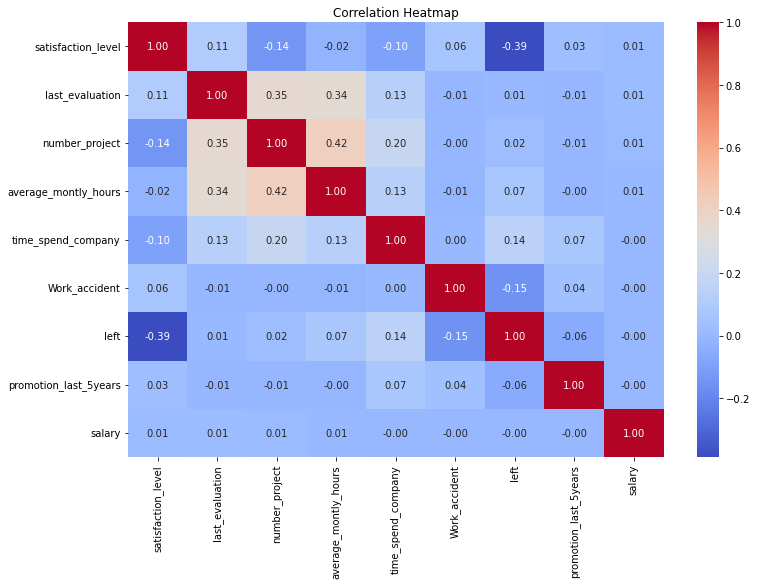

In [ ]:
# Plot a heatmap to visualize the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# Import OneHotEncoder for encoding categorical variables
from sklearn.preprocessing import OneHotEncoder

# Apply OneHotEncoding to the 'dept' column
one_hot_encoder = OneHotEncoder(sparse=False)
encoded_array = one_hot_encoder.fit_transform(df[['dept']]).astype(int)

# Convert the encoded array into a DataFrame with appropriate column names
encoded_df = pd.DataFrame(encoded_array, columns=one_hot_encoder.get_feature_names_out(['dept']))
df = pd.concat([df, encoded_df], axis=1).drop('dept', axis=1)


/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [57]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,dept_IT,dept_RandD,dept_accounting,dept_hr,dept_management,dept_marketing,dept_product_mng,dept_sales,dept_support,dept_technical
0,0.38,0.53,2,157,3,0,1,0,1,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,2,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,2,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,1,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,1,0,0,0,0,0,0,0,1,0,0


In [ ]:
# Import MinMaxScaler for feature scaling
from sklearn.preprocessing import MinMaxScaler

# Scale the dataset to a range of 0 to 1 for better model performance
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
df_scaled.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,dept_IT,dept_RandD,dept_accounting,dept_hr,dept_management,dept_marketing,dept_product_mng,dept_sales,dept_support,dept_technical
0,0.318681,0.265625,0.0,0.285047,0.125,0.0,1.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.780220,0.781250,0.6,0.775701,0.500,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.021978,0.812500,1.0,0.822430,0.250,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.692308,0.796875,0.6,0.593458,0.375,0.0,1.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.307692,0.250000,0.0,0.294393,0.125,0.0,1.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (70% training, 30% testing)
X = df_scaled.drop('left', axis=1) 
y = df_scaled['left'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
# Import RandomForestClassifier and metrics for modeling and evaluation
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize and train a Random Forest Classifier with balanced class weights
model = RandomForestClassifier(class_weight='balanced', random_state=42)
model.fit(X_train, y_train)

# Predict the target variable on the test set
y_pred = model.predict(X_test)

# Evaluate the model's accuracy and print a classification report
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.9875555555555555
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      3428
         1.0       0.99      0.96      0.97      1072

    accuracy                           0.99      4500
   macro avg       0.99      0.98      0.98      4500
weighted avg       0.99      0.99      0.99      4500



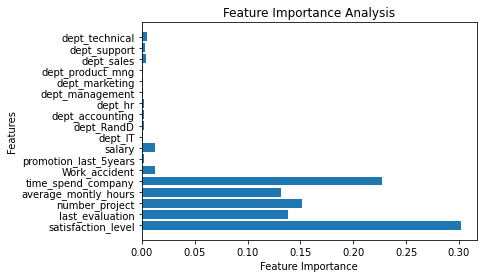

In [ ]:
# Analyze feature importance from the Random Forest model
feature_importances = model.feature_importances_
features = X.columns

# Plot a bar chart to visualize feature importance
plt.barh(features, feature_importances)
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance Analysis")
plt.show()


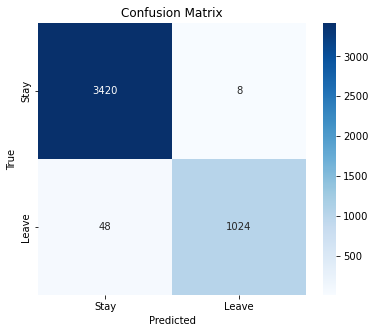

In [ ]:
# Import confusion_matrix for evaluating classification performance
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Stay", "Leave"], yticklabels=["Stay", "Leave"])

# Add labels, title, and show the plot
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()